# Data Extraction and EDA: Hospitalizations by State

In [3]:
import pandas as pd
import pickle
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [4]:
# Take a look at the format Austin put the data into:
cases = pickle.load(open("../data/us_state_cases_deaths.p", "rb"))
display(cases.sort_values(by=["date"], ascending=True))

,date,state,fips,cases,deaths,abbrev,days_since_20200101
0,2020-01-21,Alabama,1,0,0,AL,20
4578,2020-01-21,Rhode Island,44,0,0,RI,20
4687,2020-01-21,South Carolina,45,0,0,SC,20
1308,2020-01-21,Hawaii,15,0,0,HI,20
4796,2020-01-21,South Dakota,46,0,0,SD,20
...,...,...,...,...,...,...,...
3487,2020-05-08,New Jersey,34,135454,8952,NJ,128
3378,2020-05-08,New Hampshire,33,2947,121,NH,128
3269,2020-05-08,Nevada,32,5972,301,NV,128
4468,2020-05-08,Pennsylvania,42,57501,3724,PA,128


In [5]:
hospitalizations_df = pd.read_csv("../data/raw_data/covidtracking_historic_states_data_raw.csv")
"""
Sort the DF by state and date, so that for each state, we see the first date of recorded hospitalizations,
all the way down to the end.
"""
hospitalizations_df = hospitalizations_df.sort_values(by=["state", "date"], ascending=True, axis=0).reset_index(drop=True)

# Date is an integer here, and if you try to automatically use datetime on it, it assumes it's unix timestamp, 
# so we must manually convert: from a float like: 20200126

hospitalizations_df["date"] = hospitalizations_df["date"].apply(str)
hospitalizations_df["date"] = pd.to_datetime(hospitalizations_df["date"].apply(
    lambda x: datetime.datetime(day=int(x[6:8]), month=int(x[4:6]), year=int(x[0:4]))
))

hospitalizations_df["date"]
display(hospitalizations_df)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-03-06,AK,0.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,9,8,8,2,NaN,NaN,NaN,NaN,NaN
1,2020-03-07,AK,0.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,14,12,12,2,0.0,0.0,4.0,0.0,4.0
2,2020-03-08,AK,0.0,14.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,20,14,14,2,0.0,0.0,2.0,0.0,2.0
3,2020-03-09,AK,0.0,23.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,32,23,23,2,0.0,0.0,9.0,0.0,9.0
4,2020-03-10,AK,0.0,23.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,32,23,23,2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,2020-05-04,WY,586.0,9868.0,NaN,13.0,60.0,NaN,NaN,NaN,...,60.0,10454,10454,10454,56,0.0,0.0,228.0,7.0,235.0
3597,2020-05-05,WY,596.0,10319.0,NaN,13.0,60.0,NaN,NaN,NaN,...,60.0,10915,10915,10915,56,0.0,0.0,451.0,10.0,461.0
3598,2020-05-06,WY,604.0,11403.0,NaN,11.0,60.0,NaN,NaN,NaN,...,60.0,12007,12007,12007,56,0.0,0.0,1084.0,8.0,1092.0
3599,2020-05-07,WY,631.0,11403.0,NaN,11.0,59.0,NaN,NaN,NaN,...,59.0,12034,12034,12034,56,0.0,-1.0,0.0,27.0,27.0


In [6]:
"""
Let's see what the minimum date is for each state, though:
"""
display(hospitalizations_df.groupby(["state"]).agg({"date": "min"}))

,date
state,
AK,2020-03-06
AL,2020-03-07
AR,2020-03-06
AS,2020-03-16
AZ,2020-03-04
CA,2020-03-04
CO,2020-03-05
CT,2020-03-07
DC,2020-03-05


In [7]:
# map state abbreviation
states_to_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

"""
NOTE:  Austin's dataset came with state full name, 
but this one does the reverse, so let's flip this dict.
"""

abbrev_to_states = dict(map(reversed, states_to_abbrev.items()))
print(abbrev_to_states)

{'AL': 'Alabama', 'AK': 'Alaska', 'AS': 'American Samoa', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'MP': 'Northern Mariana Islands', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VI': 'Virgin Islands', 'VA': 'Virginia', 'WA': 'Wa

In [8]:
# now match Austin's state formatting, where a column called "state" displays full state name
# and a column called "abbrev" displays the abbreviation
hospitalizations_df["abbrev"] = hospitalizations_df["state"]
hospitalizations_df["state"] = hospitalizations_df["state"].map(abbrev_to_states)

In [9]:
hospitalizations_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease', 'abbrev'],
      dtype='object')

In [10]:
"""
I mostly just want to get a sense of whether there are any missing dates in between the recorded days,
or if I just need to impute a bunch of dates to match up with the time frame that Austin set. 

His minimum date is: 2020-01-21

So, let's do some investigations. First, just look at a set from a specific date.
"""
pd.set_option("display.max_rows", 1000)
display(hospitalizations_df[hospitalizations_df["abbrev"] == "AK"])

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,abbrev
0,2020-03-06,Alaska,0.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,...,9,8,8,2,NaN,NaN,NaN,NaN,NaN,AK
1,2020-03-07,Alaska,0.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN,...,14,12,12,2,0.0,0.0,4.0,0.0,4.0,AK
2,2020-03-08,Alaska,0.0,14.0,6.0,NaN,NaN,NaN,NaN,NaN,...,20,14,14,2,0.0,0.0,2.0,0.0,2.0,AK
3,2020-03-09,Alaska,0.0,23.0,9.0,NaN,NaN,NaN,NaN,NaN,...,32,23,23,2,0.0,0.0,9.0,0.0,9.0,AK
4,2020-03-10,Alaska,0.0,23.0,9.0,NaN,NaN,NaN,NaN,NaN,...,32,23,23,2,0.0,0.0,0.0,0.0,0.0,AK
5,2020-03-11,Alaska,0.0,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,60,46,46,2,0.0,0.0,23.0,0.0,23.0,AK
6,2020-03-12,Alaska,0.0,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,60,46,46,2,0.0,0.0,0.0,0.0,0.0,AK
7,2020-03-13,Alaska,1.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,...,60,60,60,2,0.0,0.0,13.0,1.0,14.0,AK
8,2020-03-14,Alaska,1.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,...,144,144,144,2,0.0,0.0,84.0,0.0,84.0,AK
9,2020-03-15,Alaska,1.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,...,144,144,144,2,0.0,0.0,0.0,0.0,0.0,AK


In [11]:
"""
Now, let's just quickly check all of them.

(I wish I hadn't named my df such a long name).
"""
for state in states_to_abbrev.keys():
    # Get minimum and maximum date per state.
    min_date = hospitalizations_df[hospitalizations_df["state"] == state]["date"].min()
    max_date = hospitalizations_df[hospitalizations_df["state"] == state]["date"].max()

    missing_dates_per_state = pd.date_range(start=min_date, end=max_date).difference(
        hospitalizations_df[hospitalizations_df["state"] == state]["date"].values
    )
    print(missing_dates_per_state)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', freq

In [12]:
hospitalizations_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease', 'abbrev'],
      dtype='object')

In [13]:
MIN_DATE = datetime.datetime(year=2020, month=1, day=21)
MAX_DATE = datetime.datetime(year=2020, month=5, day=5)

def impute_missing_dates(df):
    """
    Function that imputes hospitalization data for missing 
    dates with None. This is to keep consistent with the original dataset,
    where they indicate none for unknown values.
    
    This is augmented from Austin's extractions notebook.
    
    
    NOTE: that there are lots of fields where there are missing values because of the discrepancy
    in terms of whether states are reporting the data or not. Imputing 0 is misleading here, since this
    is  possibly just unreported data. Because of this, I only added zeros if there are 
    numeric values in the column for a given state. 
    
    Otherwise, leave NaN / None in order to indicate that the state has not started collecting data.
    """

    # iterate through all states
    imputed_data = []
    for state in df["state"].unique():
        # build list of missing dates
        # https://stackoverflow.com/questions/7274267/print-all-day-dates-between-two-dates
        sdate = MIN_DATE
        edate = df.loc[df["state"] == state]["date"].min()
        delta = edate - sdate 

        # Iterate through all missing dates and impute hospitalization status data
        # To keep fidelity with the dataset, instead of imputing 0s, we'll impute None
        for i in range(delta.days):
            day = sdate + datetime.timedelta(days=i)
            imputed_data.append({"date": day,
                                 "state": state,
                                 "positive": None,
                                 "negative": None,
                                 "pending": None,
                                 "hospitalizedCurrently": None,
                                 "hospitalizedCumulative": None,
                                 "inIcuCurrently": None,
                                 "inIcuCumulative": None,
                                 "onVentilatorCurrently": None,
                                 "onVentilatorCumulative": None,
                                 "recovered": None,
                                 "dataQualityGrade": None,
                                 "lastUpdateEt": None,
                                 "hash": None,
                                 "dateChecked": None,
                                 "death": None,
                                 "hospitalized": None, 
                                 "total": None, 
                                 "pending": None,
                                 "totalTestResults": None,
                                 "posNeg": None,
                                 "fips": None,
                                 "deathIncrease": None,
                                 "hospitalizedIncrease": None,
                                 "negativeIncrease": None,
                                 "positiveIncrease": None,
                                 "totalTestResultsIncrease": None,
                                 "abbrev": states_to_abbrev[state]})   
       

    # final cleanup
    new_df = pd.concat([pd.DataFrame(imputed_data), df])
    new_df = new_df.sort_values(by=["state", "date"]).reset_index().drop("index", axis=1)
    
    return new_df
    

In [14]:
imputed_hosp_df = impute_missing_dates(hospitalizations_df)
display(imputed_hosp_df)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,abbrev
0,2020-01-21,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,AL
1,2020-01-22,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,AL
2,2020-01-23,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,AL
3,2020-01-24,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,AL
4,2020-01-25,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,2020-05-04,Wyoming,586.0,9868.0,NaN,13.0,60.0,NaN,NaN,NaN,...,10454,10454,10454,56,0.0,0.0,228.0,7.0,235.0,WY
6100,2020-05-05,Wyoming,596.0,10319.0,NaN,13.0,60.0,NaN,NaN,NaN,...,10915,10915,10915,56,0.0,0.0,451.0,10.0,461.0,WY
6101,2020-05-06,Wyoming,604.0,11403.0,NaN,11.0,60.0,NaN,NaN,NaN,...,12007,12007,12007,56,0.0,0.0,1084.0,8.0,1092.0,WY
6102,2020-05-07,Wyoming,631.0,11403.0,NaN,11.0,59.0,NaN,NaN,NaN,...,12034,12034,12034,56,0.0,-1.0,0.0,27.0,27.0,WY


In [15]:
numeric_columns = ['positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'death', 'hospitalized', 'total', 
        'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease']


def fill_nulls_until_first_val(df):
    """
    One issue with this dataset is that they have a bunch of missing values.
    However, some states don't even report some of the metrics. Because of this, 
    we need to be careful not to impute with 0s where the dataset is simply missing.
    
    So, we'll only impute zeros for any column for a given state that has started 
    recording values. Since sometimes the states skip recording the data on some days 
    (found a couple instances of this), we must also only do this for NaNS / Nones 
    leading up to the first recorded value.
    """
    df = df.copy()
    for state in states_to_abbrev.keys():
        state_df = df[df["state"] == state]
        for nc in numeric_columns:
            # Returns a series; indices are not kept, so don't use this again.
            state_rows_nc = df[df["state"] == state][nc]
            if state_rows_nc.isnull().values.all():
                # Don't impute; this state doesn't actually record this metric
                continue;
            """
            Only fill up to the first recording of this metric:
            """
            first_recorded_value = state_df[state_df[nc].notnull() == True]["date"].idxmin()
            start_state_nc = state_df[state_df[nc].notnull() == False]["date"].idxmin()
            df[nc][start_state_nc:first_recorded_value] = 0
    return df
            

imputed_hosp = fill_nulls_until_first_val(imputed_hosp_df)

/Users/Emily/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
pd.set_option("display.max_rows", 1000)
display(imputed_hosp)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,abbrev
0,2020-01-21,Alabama,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,AL
1,2020-01-22,Alabama,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,AL
2,2020-01-23,Alabama,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,AL
3,2020-01-24,Alabama,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,AL
4,2020-01-25,Alabama,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,2020-05-04,Wyoming,586.0,9868.0,NaN,13.0,60.0,NaN,NaN,NaN,...,10454,10454,10454,56,0.0,0.0,228.0,7.0,235.0,WY
6100,2020-05-05,Wyoming,596.0,10319.0,NaN,13.0,60.0,NaN,NaN,NaN,...,10915,10915,10915,56,0.0,0.0,451.0,10.0,461.0,WY
6101,2020-05-06,Wyoming,604.0,11403.0,NaN,11.0,60.0,NaN,NaN,NaN,...,12007,12007,12007,56,0.0,0.0,1084.0,8.0,1092.0,WY
6102,2020-05-07,Wyoming,631.0,11403.0,NaN,11.0,59.0,NaN,NaN,NaN,...,12034,12034,12034,56,0.0,-1.0,0.0,27.0,27.0,WY


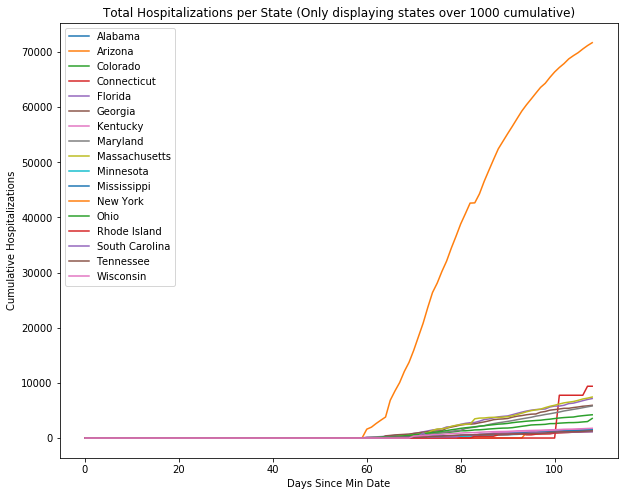

In [17]:
plt.figure(figsize=(10, 8))

for state in states_to_abbrev:
    cumulative_hosp = imputed_hosp[imputed_hosp["state"] == state]["hospitalizedCumulative"]
    if cumulative_hosp.values.max() > 1000:
        plt.plot(range(len(cumulative_hosp)), cumulative_hosp, label=state)

plt.xlabel(f"Days Since Min Date")
plt.ylabel("Cumulative Hospitalizations")
plt.title("Total Hospitalizations per State (Only displaying states over 1000 cumulative)")
plt.legend()

Text(0.5, 1.0, 'Total ICU Hospitalizations Per State (Only States Exceeding 100 ICUs Cumulative)')

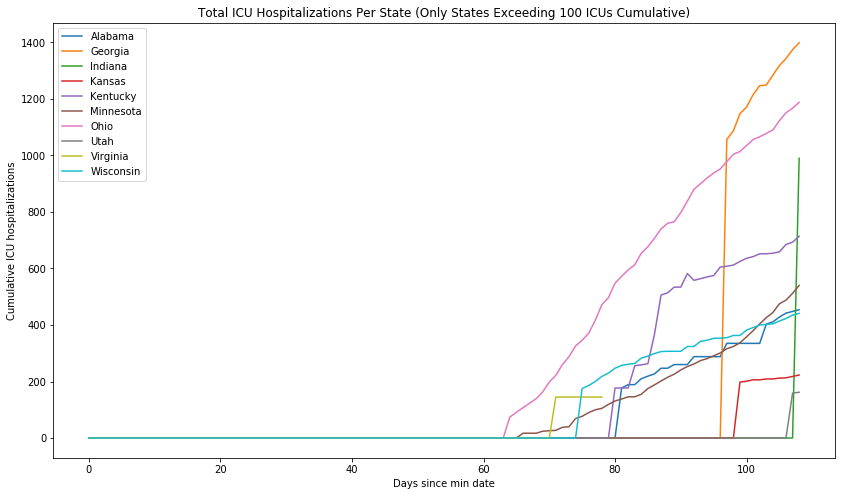

In [18]:
plt.figure(figsize=(14, 8))

for state in states_to_abbrev:
    cumulative_icu = imputed_hosp[imputed_hosp["state"] == state]["inIcuCumulative"]
    if cumulative_icu.max() > 100:
        plt.plot(range(len(cumulative_icu)), cumulative_icu, label=state)
plt.legend()
plt.xlabel("Days since min date")
plt.ylabel("Cumulative ICU hospitalizations")
plt.title("Total ICU Hospitalizations Per State (Only States Exceeding 100 ICUs Cumulative)")

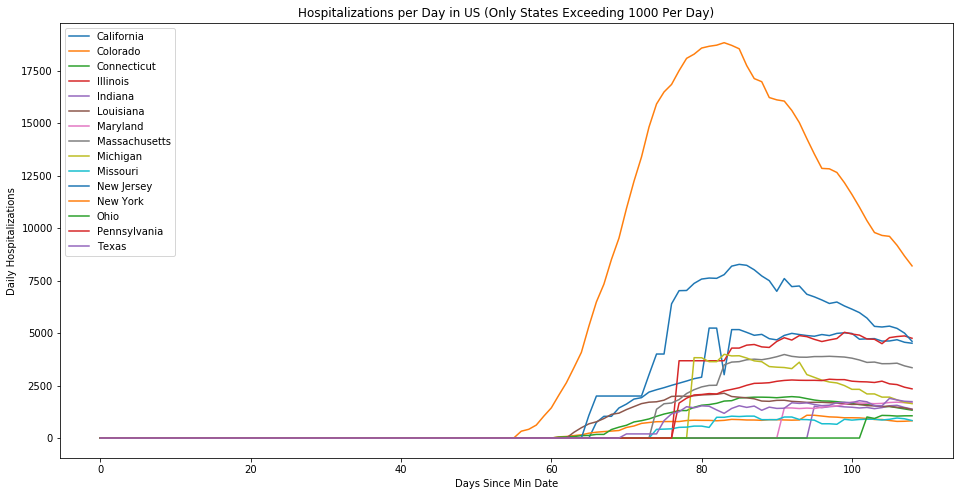

In [19]:
plt.figure(figsize=(16, 8))

for state in states_to_abbrev:
    hosps_per_day = imputed_hosp[imputed_hosp["state"] == state]["hospitalizedCurrently"]
    if hosps_per_day.values.max() > 1000:
        plt.plot(range(len(hosps_per_day)), hosps_per_day, label=state)

plt.title("Hospitalizations per Day in US (Only States Exceeding 1000 Per Day)")
plt.xlabel("Days Since Min Date")
plt.ylabel("Daily Hospitalizations")
plt.legend()

In [20]:
def days_since_20200101(df):
    # create days_since_20200101 col
    START_DATE = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
    df["days_since_20200101"] = (df["date"] - START_DATE).dt.days
    
    return df

imputed_hosp_df = days_since_20200101(imputed_hosp_df)
display(imputed_hosp_df)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,abbrev,days_since_20200101
0,2020-01-21,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,NaN,NaN,NaN,NaN,NaN,AL,20
1,2020-01-22,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,NaN,NaN,NaN,NaN,NaN,AL,21
2,2020-01-23,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,NaN,NaN,NaN,NaN,NaN,AL,22
3,2020-01-24,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,NaN,NaN,NaN,NaN,NaN,AL,23
4,2020-01-25,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,NaN,NaN,NaN,NaN,NaN,AL,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,2020-05-04,Wyoming,586.0,9868.0,NaN,13.0,60.0,NaN,NaN,NaN,...,10454,10454,56,0.0,0.0,228.0,7.0,235.0,WY,124
6100,2020-05-05,Wyoming,596.0,10319.0,NaN,13.0,60.0,NaN,NaN,NaN,...,10915,10915,56,0.0,0.0,451.0,10.0,461.0,WY,125
6101,2020-05-06,Wyoming,604.0,11403.0,NaN,11.0,60.0,NaN,NaN,NaN,...,12007,12007,56,0.0,0.0,1084.0,8.0,1092.0,WY,126
6102,2020-05-07,Wyoming,631.0,11403.0,NaN,11.0,59.0,NaN,NaN,NaN,...,12034,12034,56,0.0,-1.0,0.0,27.0,27.0,WY,127


In [21]:
# dump to pickle file
pickle.dump(imputed_hosp, open("../data/covidtracking_historic_states_data.p", "wb" ))

In [24]:
abbrev_to_states.keys()

dict_keys(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY'])